In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('day.csv')

# Preview the data
# 'cnt' is the total count of rentals (this is our Target variable)
# 'temp' is normalized temperature (0-1 scale)
# 'weathersit' is the weather category (1=Clear, 2=Mist, 3=Rain/Snow)
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
# 1. Map the Season Numbers to Names
df['Season_Name'] = df['season'].map({
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
})

# 2. Map the Weather Situation Numbers
# Note: These definitions come from the dataset documentation
df['Weather_Condition'] = df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
})

# 3. Denormalize Temperature (Optional but good for display)
# The data was divided by 41 (max temp), so we multiply by 41 to get real Celsius
df['Real_Temp_C'] = df['temp'] * 41

print(df[['dteday', 'Real_Temp_C', 'Weather_Condition', 'cnt']].head())

       dteday  Real_Temp_C    Weather_Condition   cnt
0  2011-01-01    14.110847         Misty/Cloudy   985
1  2011-01-02    14.902598         Misty/Cloudy   801
2  2011-01-03     8.050924  Clear/Partly Cloudy  1349
3  2011-01-04     8.200000  Clear/Partly Cloudy  1562
4  2011-01-05     9.305237  Clear/Partly Cloudy  1600


C:\Users\Hey\AppData\Local\Temp\ipykernel_2720\579361056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_Condition', y='cnt', data=df, palette="Set2")


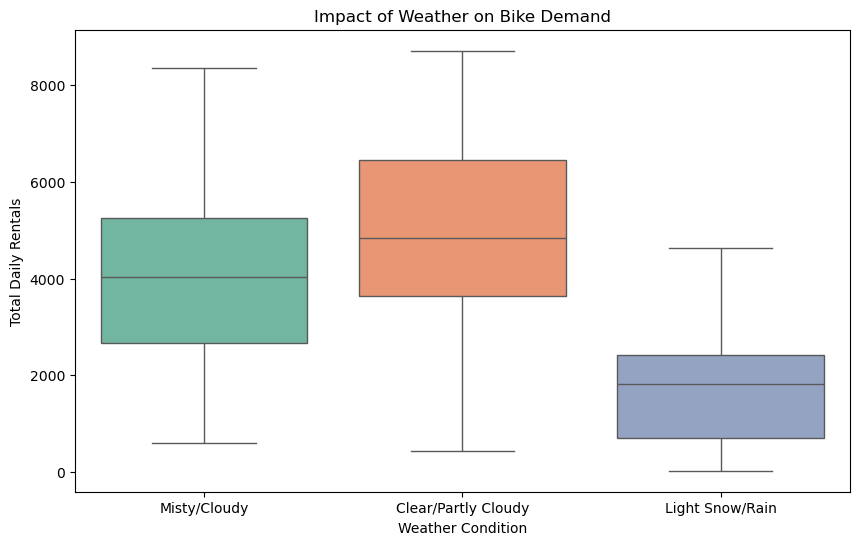

In [7]:
plt.figure(figsize=(10, 6))
# We use the new readable 'Weather_Condition' column
sns.boxplot(x='Weather_Condition', y='cnt', data=df, palette="Set2")

plt.title("Impact of Weather on Bike Demand")
plt.ylabel("Total Daily Rentals")
plt.xlabel("Weather Condition")
plt.show()

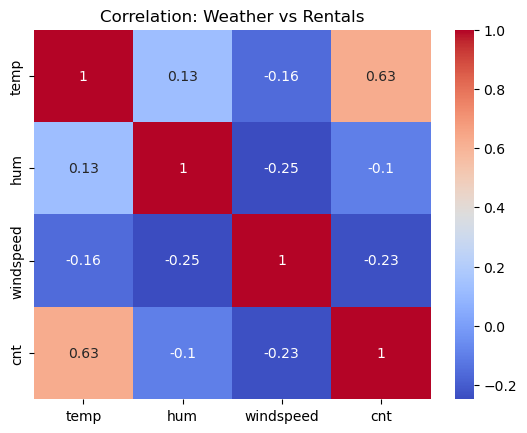

In [9]:
# Select numeric columns
cols_to_check = ['temp', 'hum', 'windspeed', 'cnt']
correlation = df[cols_to_check].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation: Weather vs Rentals")
plt.show()

In [11]:
df.to_csv('Bike_Demand_Cleaned.csv', index=False)
print("Saved successfully! Open 'Bike_Demand_Cleaned.csv' in Power BI.")

Saved successfully! Open 'Bike_Demand_Cleaned.csv' in Power BI.
